In [2]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

#Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

In [3]:
# File to Load
mouse_drug_data = "data/mouse_drug_data.csv"
clinical_trial = "data/clinicaltrial_data.csv"

In [4]:
# Read the Mouse and Drug Data and the Clinical Trial Data using pandas
mouse_d = pd.read_csv(mouse_drug_data)
clinical_d = pd.read_csv(clinical_trial)
mouse_d.head()
clinical_d.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [5]:
# Combine the data into a single dataset
trial_data_complete_df = pd.merge(mouse_d, clinical_d, how="left", on=["Mouse ID"])
trial_data_complete_df.head()


# Display the data table for preview

,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


## Tumor Response to Treatment

In [6]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 

tumor_vol_grouped = trial_data_complete_df.groupby(["Drug","Timepoint"]).mean()
tumor_vol_grouped.head()

Tumor Volume (mm3)  Metastatic Sites
Drug      Timepoint                                      
Capomulin 0                   45.000000          0.000000
          5                   44.266086          0.160000
          10                  43.084291          0.320000
          15                  42.064317          0.375000
          20                  40.716325          0.652174

In [7]:
# Convert to DataFrame
# Extract only columns "Drug", "Timepoint" and "Tumor Volume (mm3)"
tumor_vol_df = trial_data_complete_df.loc[:,['Drug', 'Timepoint', 'Tumor Volume (mm3)']]


# Preview DataFrame
tumor_vol_df.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Stelasyn,0,45.000000
1,Stelasyn,5,47.313491
2,Stelasyn,10,47.904324
3,Stelasyn,15,48.735197
4,Stelasyn,20,51.112713


In [8]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
tumor_se_response = tumor_vol_df.groupby(["Drug","Timepoint"])["Tumor Volume (mm3)"].sem()
# Convert to DataFrame
tumor_response_error_df = tumor_se_response.to_frame()
# Preview DataFrame
tumor_response_error_df.head()


Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                    0.000000
          5                    0.448593
          10                   0.702684
          15                   0.838617
          20                   0.909731

In [9]:
# Minor Data Munging to Re-Format the Data Frames
tumor_res_reformat = tumor_vol_grouped.unstack(0)
tumor_res_reformat_df = tumor_res_reformat ["Tumor Volume (mm3)"]
tumor_res_reformat_df.head()
# Preview that Reformatting worked


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


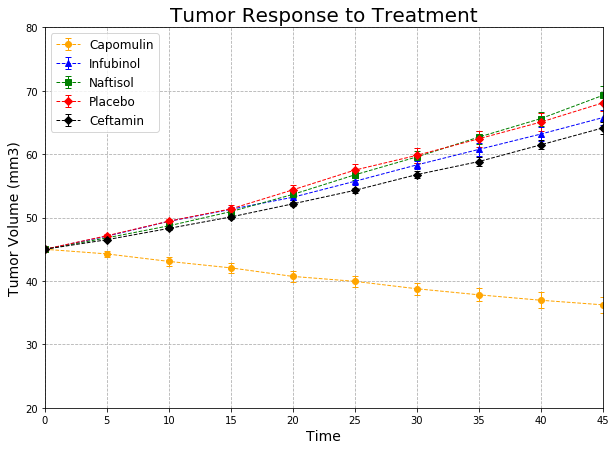

In [25]:
# Generate the Plot with mean values (with Error Bars)
#Set the x axis values in increments of 5
x_axis = [0,5,10,15,20,25,30,35,40,45]
x_limit = 45
plt.figure(figsize = (10,7))


error = tumor_response_error_df["Tumor Volume (mm3)"]["Capomulin"]
capomulin = plt.errorbar(x_axis, tumor_res_reformat_df["Capomulin"], yerr=error, fmt="o", ls="dashed", linewidth=1, alpha=1, capsize=3,color ="Orange")

error = tumor_response_error_df["Tumor Volume (mm3)"]["Infubinol"]
infubinol = plt.errorbar(x_axis, tumor_res_reformat_df["Infubinol"], yerr=error, fmt="^", ls="dashed", linewidth=1, alpha=1, capsize=3,color ="blue")

error = tumor_response_error_df["Tumor Volume (mm3)"]["Naftisol"]
Naftisol = plt.errorbar(x_axis, tumor_res_reformat_df["Naftisol"], yerr=error, fmt="s", ls="dashed", linewidth=1, alpha=1, capsize=3,color = "green")

error = tumor_response_error_df["Tumor Volume (mm3)"]["Placebo"]
Placebo = plt.errorbar(x_axis, tumor_res_reformat_df["Placebo"], yerr=error, fmt="D", ls="dashed", linewidth=1, alpha=1, capsize=3,color = "red")

error = tumor_response_error_df["Tumor Volume (mm3)"]["Ceftamin"]
Ceftamin = plt.errorbar(x_axis, tumor_res_reformat_df["Ceftamin"], yerr=error, fmt="D", ls="dashed", linewidth=1, alpha=1, capsize=3,color = "black")


#Set the limits for x and y axis

plt.ylim(20, 80)
plt.xlim(0, 45)

#Set the titles
plt.title("Tumor Response to Treatment", fontsize=20)
plt.xlabel("Time", fontsize=14)
plt.ylabel("Tumor Volume (mm3)", fontsize=14)

# Plot the Figure
plt.grid(linestyle="dashed")
plt.legend((capomulin, infubinol, Naftisol, Placebo, Ceftamin), ("Capomulin", "Infubinol", "Naftisol", "Placebo", "Ceftamin"), fontsize=12)
plt.show()





![Tumor Response to Treatment](../Images/treatment.png)

## Metastatic Response to Treatment

In [11]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint
# Convert to DataFrame
metastatic_response = trial_data_complete_df.groupby(["Drug", "Timepoint"])
metastatic_df = metastatic_response["Metastatic Sites"].mean().to_frame()

# Preview DataFrame
metastatic_df.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [28]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint
metastatic_response_error = trial_data_complete_df.groupby(["Drug","Timepoint"])["Metastatic Sites"].sem()
# Convert to DataFrame
meta_res_err_df = metastatic_response_error.to_frame()
# Preview DataFrame
meta_res_err_df.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [29]:
# Minor Data Munging to Re-Format the Data Frames
meta_res_plot_df = meta_res_err_df["Metastatic Sites"]


# Preview that Reformatting worked
meta_res_plot_df.head()

Drug       Timepoint
Capomulin  0            0.000000
           5            0.074833
           10           0.125433
           15           0.132048
           20           0.161621
Name: Metastatic Sites, dtype: float64

In [14]:
# Generate the Plot (with Error Bars)


# Save the Figure

# Show the Figure


![Metastatic Spread During Treatment](../Images/spread.png)

## Survival Rates

In [15]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)

# Convert to DataFrame

# Preview DataFrame


In [16]:
# Minor Data Munging to Re-Format the Data Frames

# Preview the Data Frame


In [17]:
# Generate the Plot (Accounting for percentages)

# Save the Figure

# Show the Figure
plt.show()

![Metastatic Spread During Treatment](../Images/survival.png)

## Summary Bar Graph

In [18]:
# Calculate the percent changes for each drug

# Display the data to confirm


In [19]:
# Store all Relevant Percent Changes into a Tuple


# Splice the data between passing and failing drugs


# Orient widths. Add labels, tick marks, etc. 


# Use functions to label the percentages of changes


# Call functions to implement the function calls


# Save the Figure


# Show the Figure
fig.show()

NameError: name 'fig' is not defined

![Metastatic Spread During Treatment](../Images/change.png)